# Heatmap of Convolutional Layer in CNN-LSTM model for Bacteria

In [1]:
# Load the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from tensorflow.compat.v1.keras.models import load_model

In [2]:
import cv2
import glob

In [3]:
# Get the pretarined model and show the summary of the model
cnn_lstm_bacteria = load_model("../../../data/secreted_data/saved_models/bacteria/cnn_lstm/model_1.30-0.33.hdf5")
cnn_lstm_bacteria.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2574, 20)]   0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 2574, 4)      80          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 2572, 4)      240         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 2570, 4)      400         input_1[0][0]                    
____________________________________________________________________________________________

# Define function

In [4]:
# Load datasets
dataset = np.load('../../../data/secreted_data/ready_to_process/encoded_files/bacteria/x_train.npy')

In [5]:
def get_sum_heatmap_from_files(data_name, class_eff, layer, verbose = True, dataset = dataset):
    npy_loading_pattern = "results_secreted/bacteria/cnn_lstm/all_matrices_" + class_eff + "_" + data_name + "_" + layer + "*.npy"
    data_loading_path = glob.glob(npy_loading_pattern)
    
    if verbose: print("Loading", data_name, "data from", len(data_loading_path) ,"files...")
    
    # Initalize empty matrix
    all_matrices = np.empty([0 , 1, np.load(data_loading_path[0]).shape[2]])

    # Append matrices from files
    for path in data_loading_path:
        data = np.load(path)
        all_matrices = np.concatenate((all_matrices, data))
        
    if verbose: print("Loaded", all_matrices.shape[0], "data samples")
    sum_all_matrices = np.sum(all_matrices, axis = 0)
    
    # Calculate heatmap
    heatmap = np.maximum(sum_all_matrices, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (dataset.shape[1], dataset.shape[2]))

    
    return(sum_all_matrices, heatmap)

In [6]:
def plot_heatmap(data, from_data, to_data, colorbar = None):
    plt.matshow(data[:,from_data:to_data], cmap = 'viridis', origin = "lower", vmin = 0, vmax = 1)
    ax = plt.gca()
    plot = ax.axes.get_yaxis().set_visible(False)
    if colorbar == "Yes":
        plt.colorbar()
    
    return plot

In [7]:
def plot_fft(data, threshold, length_to_plot):
    
    # reshape data
    data = data.reshape(data.shape[1])
    
    # transform real data to the frequency domain (Fourier transform)
    real_ft = np.fft.rfft(data)
    
    # remove undesired frequencies
    real_ft[threshold:] = 0 
    
    # move back to the time domain. (Inverse fourier transform)
    smooth_data = np.fft.irfft(real_ft)
    
    # plot the results
    plt.figure(figsize=[30, 12])
    plt.plot(data[:length_to_plot], label='Original')
    plt.plot(smooth_data[0:length_to_plot],'r', linewidth=3, label='Smooth')
    plt.legend(loc=0)
    plt.show()

In [8]:
# Define the function

def plot_bar(data, from_data = None, to_data = None):
    
    if from_data is not None and to_data is not None:
        data = data[:,from_data:to_data].ravel()
    else:
        data = data.ravel()
         
    plt.plot(data)
    fig = plt.gcf()
    fig.set_size_inches(30, 10)
    plt.xlabel('Position')
    plt.ylabel('Importance Score')

## Get all of the matrices from the the first (conv1d_1) convolutional layer

In [10]:
sum_all_matrices_xtrain_cnn_lstm, x_train_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_train", "bacteria", "conv1d_1")

Loading x_train data from 1 files...
Loaded 228 data samples


In [11]:
sum_all_matrices_xval_cnn_lstm, x_val_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_val", "bacteria", "conv1d_1")

Loading x_val data from 1 files...
Loaded 76 data samples


In [12]:
sum_all_matrices_xtest_cnn_lstm, x_test_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_test", "bacteria", "conv1d_1")

Loading x_test data from 1 files...
Loaded 76 data samples


### Plot the training data

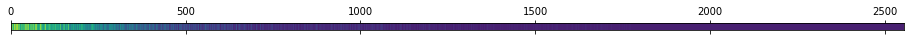

In [13]:
plot_heatmap(x_train_bacteria_cnn_lstm, x_train_bacteria_cnn_lstm.shape[0], x_train_bacteria_cnn_lstm.shape[1])

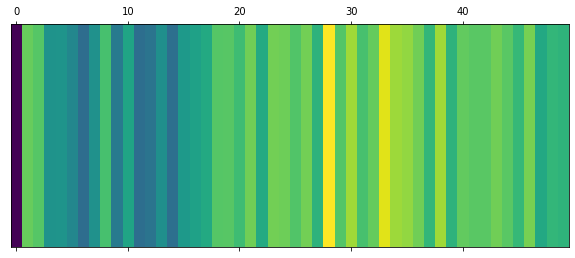

In [17]:
plot_heatmap(x_train_bacteria_cnn_lstm, 0, 50)

### Plot the validation data

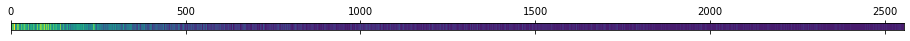

In [19]:
plot_heatmap(x_val_bacteria_cnn_lstm, x_val_bacteria_cnn_lstm.shape[0], x_val_bacteria_cnn_lstm.shape[1])

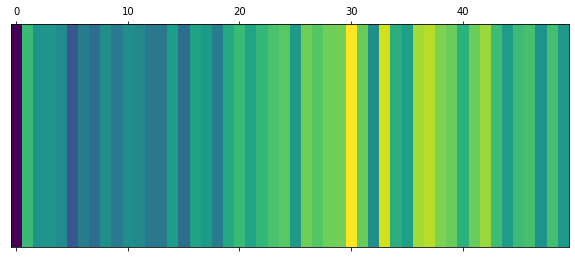

In [21]:
plot_heatmap(x_val_bacteria_cnn_lstm, 0, 50)

### Plot the testing data

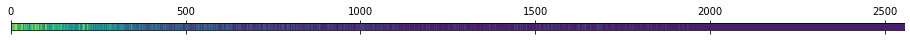

In [22]:
plot_heatmap(x_test_bacteria_cnn_lstm, x_test_bacteria_cnn_lstm.shape[0], x_test_bacteria_cnn_lstm.shape[1])

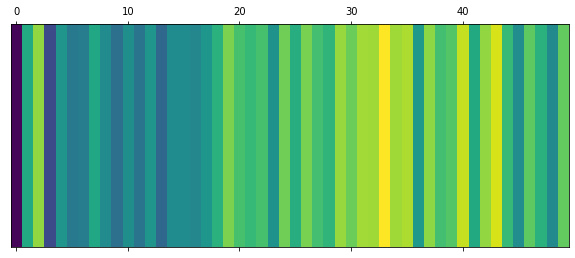

In [23]:
plot_heatmap(x_test_bacteria_cnn_lstm, 0, 50)

## Get all of the matrices from the the first (conv1d_3) convolutional layer

In [18]:
sum_all_matrices_xtrain_cnn_lstm, x_train_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_train", "bacteria", "conv1d_3")

Loading x_train data from 10 files...
Loaded 228 data samples


In [16]:
sum_all_matrices_xval_cnn_lstm, x_val_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_val", "bacteria", "conv1d_2")

Loading x_val data from 4 files...
Loaded 76 data samples


In [11]:
sum_all_matrices_xtest_cnn_lstm, x_test_bacteria_cnn_lstm = get_sum_heatmap_from_files("x_test", "bacteria", "conv1d_3")

Loading x_test data from 4 files...
Loaded 76 data samples


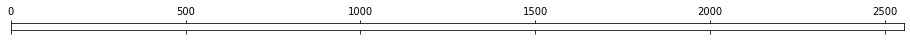

In [19]:
plot_heatmap(x_train_bacteria_cnn_lstm, x_train_bacteria_cnn_lstm.shape[0], x_train_bacteria_cnn_lstm.shape[1])

In [21]:
sum_all_matrices_xtrain_cnn_lstm

array([[nan, nan, nan, ..., nan, nan, nan]])